In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
sns.set()

In [214]:
iris_df = pd.read_csv('Iris.csv')

In [215]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [216]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [217]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [218]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [219]:
iris_df.drop(['Id'],inplace=True,axis=1)

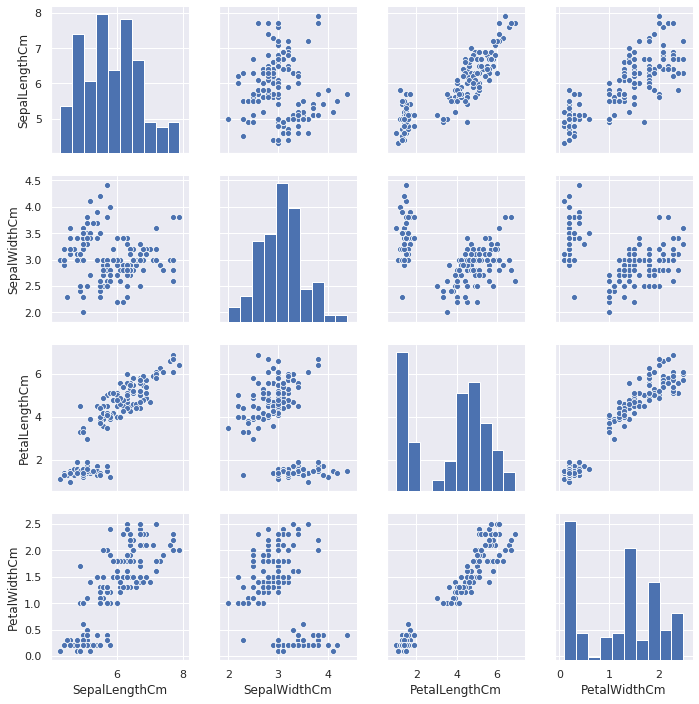

In [220]:
sns.pairplot(iris_df, palette="husl")

<blockquote>
    
Looking at the above scatterplots comparing all the attributes to each other we can visibly see two clusters forming. Looking at all the plots you can see that all the plots involving PetalLengthCm, PetalWidthCm and SepalWidthCm seem to create better grouped clusters that are less polluted and seem more likely to be completely mutally exclusive.Therefore these two atributes seem like they are the best to model with.

</blockquote>

In [231]:
iris_df['Species'] = iris_df['Species'].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})

In [276]:
X = iris_df[['PetalLengthCm','PetalWidthCm','SepalWidthCm']].values
y = iris_df.Species

In [277]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

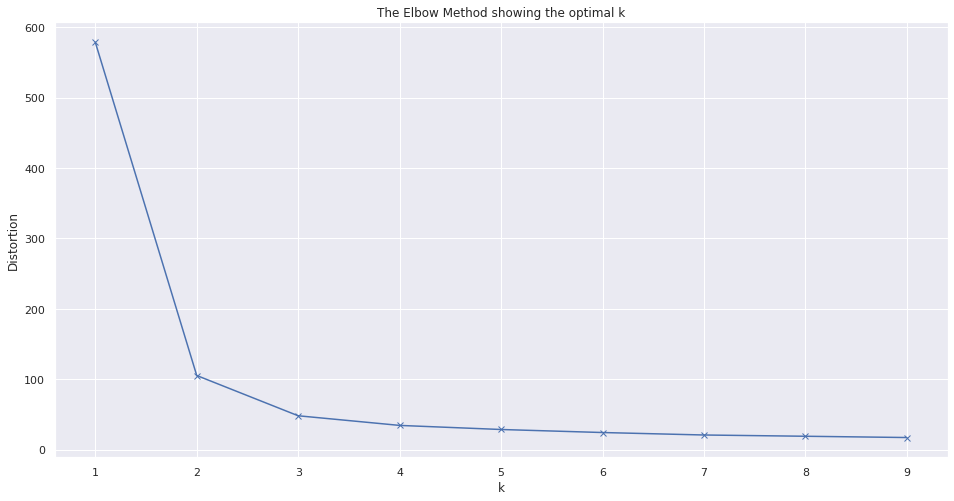

In [278]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<blockquote>
    
Although I've only identified two clusters by examining the data after looking at the elbow plot we can see that there are 3 clusters these clusters may not be visible by just looking at the plot but could still be there. Therefore, I will model with 3 clusters.
    
</blockquote>

In [279]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [280]:
kmodel = kmeans.fit(X)
kmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [281]:
kmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<blockquote>
    
These are the 3 categories the model puts the values into so there are the clusters.

</blockquote>

In [282]:
kmodel.cluster_centers_

array([[4.28113208, 1.3509434 , 2.75471698],
       [1.464     , 0.244     , 3.418     ],
       [5.6106383 , 2.04255319, 3.00425532]])

Text(0.5, 1, 'Confusion Matrix')

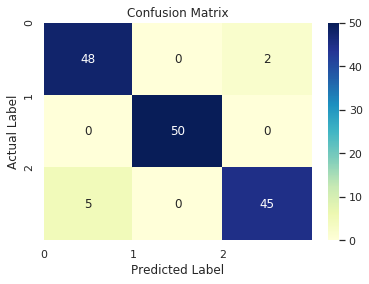

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(pd.crosstab(y,kmodel.labels_),annot=True,cmap="YlGnBu" ,fmt='g')
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

<blockquote>
    
Looking at the confusion matrix we can see that the model is performing really well. In the first row it is only miscategorizing 2 values, on the second it's completely accurate and the third it's only miscategorizing 5 values.
    
</blockquote>    

In [284]:
sm.accuracy_score(y,kmodel.labels_)

0.9533333333333334

<blockquote>
    
There model has an accuracy of 95%, meaning it can accurately make predictions 95% of the time and is performing really well.

</blockquote>

Text(0.5, 1.0, 'Predicted')

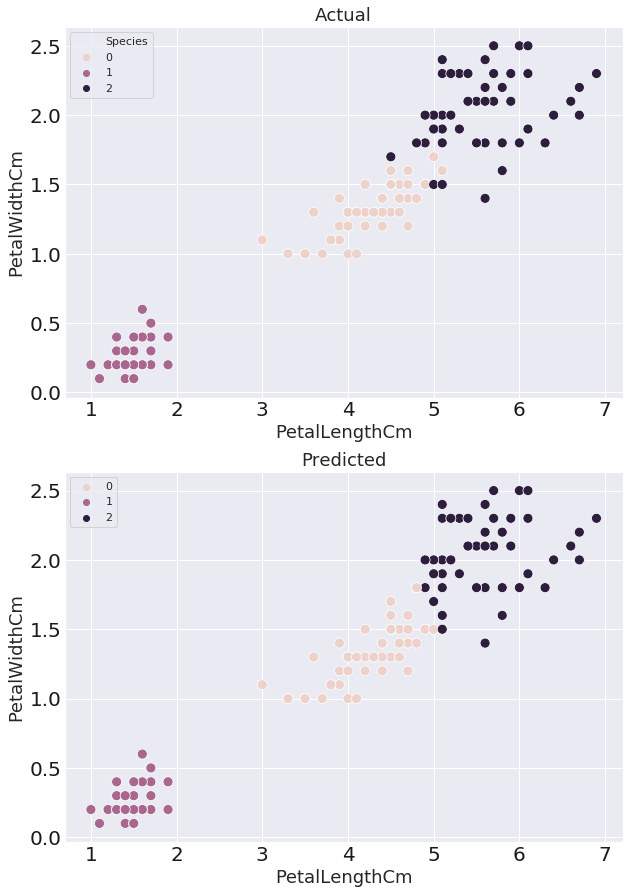

In [266]:
f, (ax1, ax2) = plt.subplots(2,figsize=(10,15))
sns.scatterplot(X[:, 0], X[:, 1], hue=iris_df['Species'], ax=ax1,s=100)
sns.scatterplot(X[:, 0], X[:, 1], hue=kmodel.labels_, ax=ax2,s=100)
ax1.set_xlabel('PetalLengthCm', fontsize=18)
ax1.set_ylabel('PetalWidthCm', fontsize=18)
ax2.set_xlabel('PetalLengthCm', fontsize=18)
ax2.set_ylabel('PetalWidthCm', fontsize=18)
ax1.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax2.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax1.set_title('Actual', fontsize=18)
ax2.set_title('Predicted', fontsize=18)

<blockquote>
    
Comparing the predicted graph to the actual graph we can see that they look very similar, with the first catergory looking as if its exactly the same. The last two clusters mix a bit, though it's very few values. But overall we can see that the model is performing really well as it has a high accuracy when putting the data points into the correct clusters.
    
</blockquote>